# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
pd.set_option('display.width', 1000)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


## Load Dataset

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/loan_data_2007_2014.csv', low_memory=False)
df.sample(10)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
411152,411152,13958140,16010475,7000,7000,7000.000000,36 months,6.62,214.93,A,A2,Bus driver,5 years,MORTGAGE,28000.0,Not Verified,Apr-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,936xx,CA,15.22,0.0,Apr-89,1.0,26.0,NaN,8.0,0.0,3291,28.6,29.0,w,3085.84,3085.84,4513.530000,4513.53,3914.16,599.37,0.0,0.00,0.00,Jan-16,214.93,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,616.0,123474.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11500.0,NaN,NaN,NaN
413153,413153,13627618,15679937,12800,12800,12800.000000,60 months,16.59,315.30,D,D1,Assistant District Attorney,1 year,RENT,50000.0,Not Verified,Apr-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,112xx,NY,14.35,0.0,Oct-01,2.0,31.0,NaN,7.0,0.0,10051,92.2,43.0,w,9455.76,9455.76,6621.300000,6621.30,3344.24,3277.06,0.0,0.00,0.00,Jan-16,315.30,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,196491.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10900.0,NaN,NaN,NaN
350165,350165,20790598,23063174,8000,8000,8000.000000,36 months,9.17,255.04,B,B1,General Superintendent,9 years,MORTGAGE,83200.0,Source Verified,Jul-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,318xx,GA,16.66,1.0,May-04,0.0,1.0,NaN,8.0,0.0,106,0.0,15.0,w,4273.46,4273.46,4590.720000,4590.72,3726.54,864.18,0.0,0.00,0.00,Jan-16,255.04,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,1.0,0.0,161688.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17800.0,NaN,NaN,NaN
444586,444586,11667412,13639583,15000,15000,15000.000000,36 months,9.67,481.69,B,B1,manager,10+ years,OWN,40000.0,Not Verified,Feb-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,233xx,VA,29.58,0.0,Jan-96,0.0,NaN,NaN,15.0,0.0,13842,69.2,32.0,f,5922.42,5922.42,11078.870000,11078.87,9077.58,2001.29,0.0,0.00,0.00,Jan-16,481.69,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,3178.0,22257.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,NaN,NaN
99942,99942,6837579,8459635,8000,8000,7950.000000,36 months,8.90,254.03,A,A5,Inventiv health clinical,4 years,MORTGAGE,200000.0,Source Verified,Aug-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Historic home renovation,787xx,TX,10.43,0.0,Jun-04,0.0,NaN,NaN,9.0,0.0,19877,89.1,13.0,f,0.00,0.00,8479.962404,8426.96,8000.00,479.96,0.0,0.00,0.00,Jun-14,6452.87,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,303288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22300.0,NaN,NaN,NaN
324226,324226,24574971,26997902,15000,15000,15000.000000,60 months,14.49,352.85,C,C4,Creative Director,4 years,MORTGAGE,108000.0,Verified,Aug-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,773xx,TX,9.69,0.0,Aug-96,1.0,46.0,NaN,12.0,0.0,15344,58.1,27.0,w,11988.98,11988.98,5645.600000,5645.60,3011.02,2634.58,0.0,0.00,0.00,Dec-15,352.85,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0

In [ ]:
pd.set_option('display.max_rows', None)
df1 =  pd.read_excel('/content/gdrive/My Drive/LCDataDictionary.xlsx')

df1

,Unnamed: 0,Description,Unnamed: 2
0,_rec,The total amount committed by investors for th...,Jumlah total yang dilakukan oleh investor untu...
1,acc_now_delinq,The number of accounts on which the borrower i...,Jumlah akun di mana peminjam sekarang nakal.
2,addr_state,The state provided by the borrower in the loan...,Negara yang disediakan oleh peminjam dalam apl...
3,all_util,Balance to credit limit on all trades,Saldo ke batas kredit untuk semua perdagangan
4,annual_inc,The self-reported annual income provided by th...,v
5,annual_inc_joint,The combined self-reported annual income provi...,Penghasilan tahunan yang dilaporkan sendiri ga...
6,application_type,Indicates whether the loan is an individual ap...,NaN
7,collection_recovery_fee,post charge off collection fee,Biaya pengumpulan biaya pengumpulan pos
8,collections_12_mths_ex_med,Number of collections in 12 months excluding m...,Jumlah koleksi dalam 12 bulan tidak termasuk k...
9,delinq_2yrs,The number of 30+ days past-due incidences of ...,Jumlah 30+ hari insiden kenakalan yang lewat d...


In [ ]:
df1.dropna()

,Unnamed: 0,Description,Unnamed: 2
0,_rec,The total amount committed by investors for th...,Jumlah total yang dilakukan oleh investor untu...
1,acc_now_delinq,The number of accounts on which the borrower i...,Jumlah akun di mana peminjam sekarang nakal.
2,addr_state,The state provided by the borrower in the loan...,Negara yang disediakan oleh peminjam dalam apl...
3,all_util,Balance to credit limit on all trades,Saldo ke batas kredit untuk semua perdagangan
4,annual_inc,The self-reported annual income provided by th...,v
5,annual_inc_joint,The combined self-reported annual income provi...,Penghasilan tahunan yang dilaporkan sendiri ga...
7,collection_recovery_fee,post charge off collection fee,Biaya pengumpulan biaya pengumpulan pos
8,collections_12_mths_ex_med,Number of collections in 12 months excluding m...,Jumlah koleksi dalam 12 bulan tidak termasuk k...
9,delinq_2yrs,The number of 30+ days past-due incidences of ...,Jumlah 30+ hari insiden kenakalan yang lewat d...
10,desc,Loan description provided by the borrower,Deskripsi pinjaman yang disediakan oleh peminjam


# Exploring Data

In [ ]:
df.shape



(466285, 75)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# Cek Duplicate Data

In [ ]:
df.id.nunique()

466285

In [ ]:
df.member_id.nunique()

466285

Berdasarkan hasil diatas terlihat bahwa kolom **id** dan kolom **member_id** tidak memiliki data yang duplikat artinya setiap satu baris sudah mewakili satu individu, oleh sebab itu kita lanjut ke langkah selanjutnya yaitu proses menghapus fitur-fitur yang mengandung nilai kosong (Missing Value), fitur yang memiliki nilai unik(id) juga yang merupakan free text

# Drop Unnecessary Feature

In [ ]:
cols_to_drop = [
    # unique id
    'id'
    , 'member_id'

    # free text
    , 'url'
    , 'desc'

    # all null / constant / others
    , 'zip_code'
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'

    # expert judgment
    , 'sub_grade'
]

In [ ]:
df = df.drop(cols_to_drop, axis=1)

In [ ]:
df.sample(10)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
19054,19054,15000,15000,14679.55728,60 months,16.02,364.94,D,dover board of education,10+ years,RENT,57444.0,Source Verified,Feb-11,Current,n,debt_consolidation,debt consilidation,NJ,18.03,0.0,Jun-93,2.0,35.0,NaN,13.0,0.0,7106,50.0,21.0,f,729.63,729.63,21140.27000,20439.59,14270.37,6869.90,0.0,0.0,0.0,Jan-16,364.94,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
211806,211806,11000,11000,10750.00000,36 months,10.74,358.78,B,Lee County Sheriffs Office,10+ years,MORTGAGE,70000.0,Not Verified,Jul-12,Fully Paid,n,debt_consolidation,Debt Consolidation,AL,29.71,1.0,Nov-96,0.0,21.0,NaN,15.0,0.0,12093,54.7,54.0,f,0.00,0.00,12914.81380,12621.29,11000.00,1914.81,0.0,0.0,0.0,Jul-15,362.07,NaN,Jul-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
90463,90463,5000,5000,5000.00000,36 months,19.52,184.60,D,Community Christian Academy,10+ years,RENT,32225.0,Not Verified,Sep-13,Current,n,other,Other,WA,6.11,0.0,Jun-04,0.0,70.0,NaN,6.0,0.0,3031,13.5,10.0,f,1374.54,1374.54,5168.20000,5168.20,3625.46,1542.74,0.0,0.0,0.0,Jan-16,184.60,Feb-16,Jan-16,0.0,70.0,1,INDIVIDUAL,0.0,77.0,3031.0,22400.0
406634,406634,16500,16500,16500.00000,60 months,14.64,389.43,C,Outside Account Executive,< 1 year,MORTGAGE,49000.0,Source Verified,Apr-14,Current,n,credit_card,Credit card refinancing,PA,14.72,0.0,Dec-77,0.0,NaN,NaN,10.0,0.0,14334,46.5,22.0,f,4400.41,4400.41,15399.17000,15399.17,12099.59,3299.58,0.0,0.0,0.0,Jan-16,389.43,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,139251.0,30800.0
10568,10568,8000,8000,8000.00000,36 months,6.99,246.99,A,university of rhode island,3 years,MORTGAGE,78000.0,Not Verified,Jul-11,Fully Paid,n,debt_consolidation,Debt Consolidation Loan,RI,12.80,0.0,Apr-99,2.0,NaN,NaN,10.0,0.0,6967,21.5,26.0,f,0.00,0.00,8764.05000,8764.05,8000.00,764.05,0.0,0.0,0.0,Jul-13,3333.51,NaN,Oct-14,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
113249,113249,2000,2000,2000.00000,36 months,12.35,66.77,B,AJ Wealth,1 year,RENT,60000.0,Verified,Jul-13,Fully Paid,n,credit_card,cc loan,NY,11.56,0.0,Oct-04,0.0,NaN,NaN,7.0,0.0,15675,93.3,15.0,w,0.00,0.00,2098.12000,2098.12,2000.00,98.12,0.0,0.0,0.0,Dec-13,1831.04,NaN,Jan-14,0.0,NaN,1,INDIVIDUAL,0.0,0.0,31047.0,16800.0
344117,344117,8500,8500,8500.00000,36 months,11.67,280.99,B,Account Manager,3 years,MORTGAGE,80000.0,Not Verified,Jul-14,Fully Paid,n,credit_card,Credit card refinancing,CO,13.23,0.0,Dec-02,1.0,64.0,NaN,8.0,0.0,8272,92.9,21.0,w,0.00,0.00,9124.02000,9124.02,8500.00,624.02,0.0,0.0,0.0,Mar-15,7157.09,NaN,Sep-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,330549.0,8900.0
260486,260486,10975,10975,10975.00000,60 months,22.99,309.33,F,Home Health Aid,6 years,RENT,25000.0,Verified,Nov-14,Current,n,debt_consolidation,Debt consolidation,NY,5.14,0.0,Apr-98,0.0,80.0,NaN,5.0,0.0,2957,30.2,13.0,w,9401.38,9401.38,4316.60000,4316.60,1573.62,2742.98,0.0,0.0,0.0,Jan-16,309.33,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,8957.0,9800.0
325320,325320,21800,21800,21800.00000,60 months,19.52,571.76,E,Welder,6 years,MORTGAGE,49596.0,Source Verified,Aug-14,Current,n,debt_consolidation,Debt consolidation,WA,13.14,0.0,Oct-00,2.0,NaN,NaN,6.0,0.0,7220,64.5,14.0,w,17867.84,17867.84,9148.16000,9148.16,3932.16,5216.00,0.0,0.0,0.0,Dec-15,571.76,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,170789.0,11200.0
176210,176210,10000,10000,10000.00000,36 months,8.90,317.54,A,Silgan Plas

Dalam project credit risk modeling, tujuan utama adalah untuk melakukan prediksi terhadap histori pembayaran individu akan kemampuan mereka dalam melakukan pembayaran terhadap pinjaman/kredit yang diberikan. Oleh karena itu, variabel target yang digunakan harus mencerminkan individu dalam hal tersebut

Dalam dataset ini variabel **loan_status** dapat dijadikan variabel target karena mendeskripsikan histori performa dari masing-masing individu dalam melakukan pembayaran terhadap pinjaman/kredit selama hidup dia.


In [ ]:
df['loan_status'].value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

Penjelasan dari masing-masing loan_status diatas adalah sebagai berikut:



1. Current artinya pembayaran lancar
2. Fully Paid artinya pembayaran lunas
3. Charged Off artinya pembayaran macet sehingga dihapusbukukan
4. Late (31-120 days) artinya telat dengan jangka waktu tertentu  
5. In Grace Period  artinya dalam masa tenggang  
6. Does not meet the credit policy. Status:Fully Paid artinya tidak memenuhi kebijakan peminjaman
7. Late (16-30 days) artinya telat dengan jangka waktu tertentu
8. Default artinya default disini sama dengan pembayaran macet
9. Does not meet the credit policy. Status:Charged Off artinya tidak memenuhi kebijakan peminjaman




Dari definisi-definisi tersebut, masing-masing individu dapat ditandai apakah mereka merupakan bad_loan(peminjam yang buruk) atau good_loan(peminjam yang baik)

Definisi bad dan good loan terkadang bisa berbeda tergantung dari kebutuhan bisnis. Pada contoh ini, saya menggunakan keterlambatan pembayaran di atas 30 hari dan yang lebih buruk dari itu sebagai penanda bad loan.


In [ ]:
bad_status = [
    'Charged Off'
    , 'Default'
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

df['bad_flag'] = np.where(df['loan_status'].isin(bad_status), 1, 0)

In [ ]:
df['bad_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

Hapus kolom awal penentu labeling/fitur yaitu kolom loan_status

In [ ]:
df.drop('loan_status', axis=1, inplace=True)

# Data Cleaning, Data Preprocessing, Feature Engineering

Pada tahapan ini akan dilakukan langkah-langkah pembersihan dan pengolahan data yang dapat memudahkan proses pemodelan/modeling nantinya

Tahap Pertama adalah mengubah value dari kolom emp_length

In [ ]:
df['emp_length'].value_counts()

10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64

In [ ]:
df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year', str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace(' years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace(' year', '')


<ipython-input-19-def9aec7563e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')


In [ ]:
df['emp_length_int'] = df['emp_length_int'].astype(float)

In [ ]:
df.drop('emp_length', axis=1, inplace=True)

Mengubah value kolom 'term'. Misal 36 months -> 36

In [ ]:
df['term'].value_counts()

 36 months    337953
 60 months    128332
Name: term, dtype: int64

In [ ]:
df['term_int'] = df['term'].str.replace(' months', '')
df['term_int'] = df['term_int'].astype(float)

In [ ]:
df.drop('term', axis=1, inplace=True)

# earliest_cr_line

Memodifikasi  `earliest_cr_line` dari format bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut. Untuk melakukan hal ini, umumnya digunakan reference date = hari ini. Namun, karena dataset ini merupakan dataset dengan periode waktu dari 2007-2014, maka akan lebih relevan jika menggunakan reference date disekitar tahun 2017. Dalam contoh ini saya menggunakan tanggal 2017-12-01 sebagai reference date.

In [ ]:
df['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [ ]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [ ]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
df['mths_since_earliest_cr_line'].head(5)

0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: mths_since_earliest_cr_line, dtype: float64

In [ ]:
df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Terdapat hal yang aneh, yaitu adanya nilai negatif

In [ ]:
df[df['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(5)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0



Berdasarkan hasil analisa diatas, nilai negatif yang ada merupakan fungsi dari Python yang salah menginterpretasikan tahun 62 menjadi tahun 2062 padahal seharusnya merupakan tahun 1962 berdasarkan dataset

Untuk mengatasi hal ini, dapat dilakukan preprocessing lebih jauh jika ingin membenarkan tahun 2062 menjadi 1962. Namun, kali ini saya hanya mengubah nilai yang negatif menjadi nilai maximum dari fitur tersebut. Karena di sini saya mengetahui bahwa nilai-nilai yang negatif artinya adalah data yang sudah tua (tahun 1900an), maka masih masuk akal jika saya mengganti nilai-nilai tersebut menjadi nilai terbesar.

Solusi untuk mengatasi hal ini adalah dengan melakukan preprocessing lebih jauh jika ingin mengubah tahun 2062 menjadi tahun 1962. Namun, kali ini saya hanya mengubah nilai yang negatif menjadi nilai maximum dari fitur tersebut. Karena disini saya mengetahui bahwa nilai-nilai negatif artinya adalah data yang sudah tua (tahun 1900an), maka masuk akal jika saya mengubah nilai-nilai tersebut menjadi nilai max.

In [ ]:
df.loc[df['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].max()

In [ ]:
df.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

## `Issue_d`

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [ ]:
df['issue_d'].head(5)

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [ ]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
df.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

##last_pymnt_d

In [ ]:
df['last_pymnt_d'].head(5)

0    Jan-15
1    Apr-13
2    Jun-14
3    Jan-15
4    Jan-16
Name: last_pymnt_d, dtype: object

In [ ]:
df['last_pymnt_d_date'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['mths_since_last_pymnt_d_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
df.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

##next_pymnt_d

In [ ]:
df['next_pymnt_d'].head(5)

0       NaN
1       NaN
2       NaN
3       NaN
4    Feb-16
Name: next_pymnt_d, dtype: object

In [ ]:
df['next_pymnt_d_date'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['mths_since_next_pymnt_d_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
df.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

##last_credit_pull_d

In [ ]:
df['last_credit_pull_d'].head(5)

0    Jan-16
1    Sep-13
2    Jan-16
3    Jan-15
4    Jan-16
Name: last_credit_pull_d, dtype: object

In [ ]:
df['last_credit_pull_d_date'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['mths_since_next_pymnt_d_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
df.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

#Exploratory Data Analysis

Correlation Check

<ipython-input-44-34d73d44f9d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

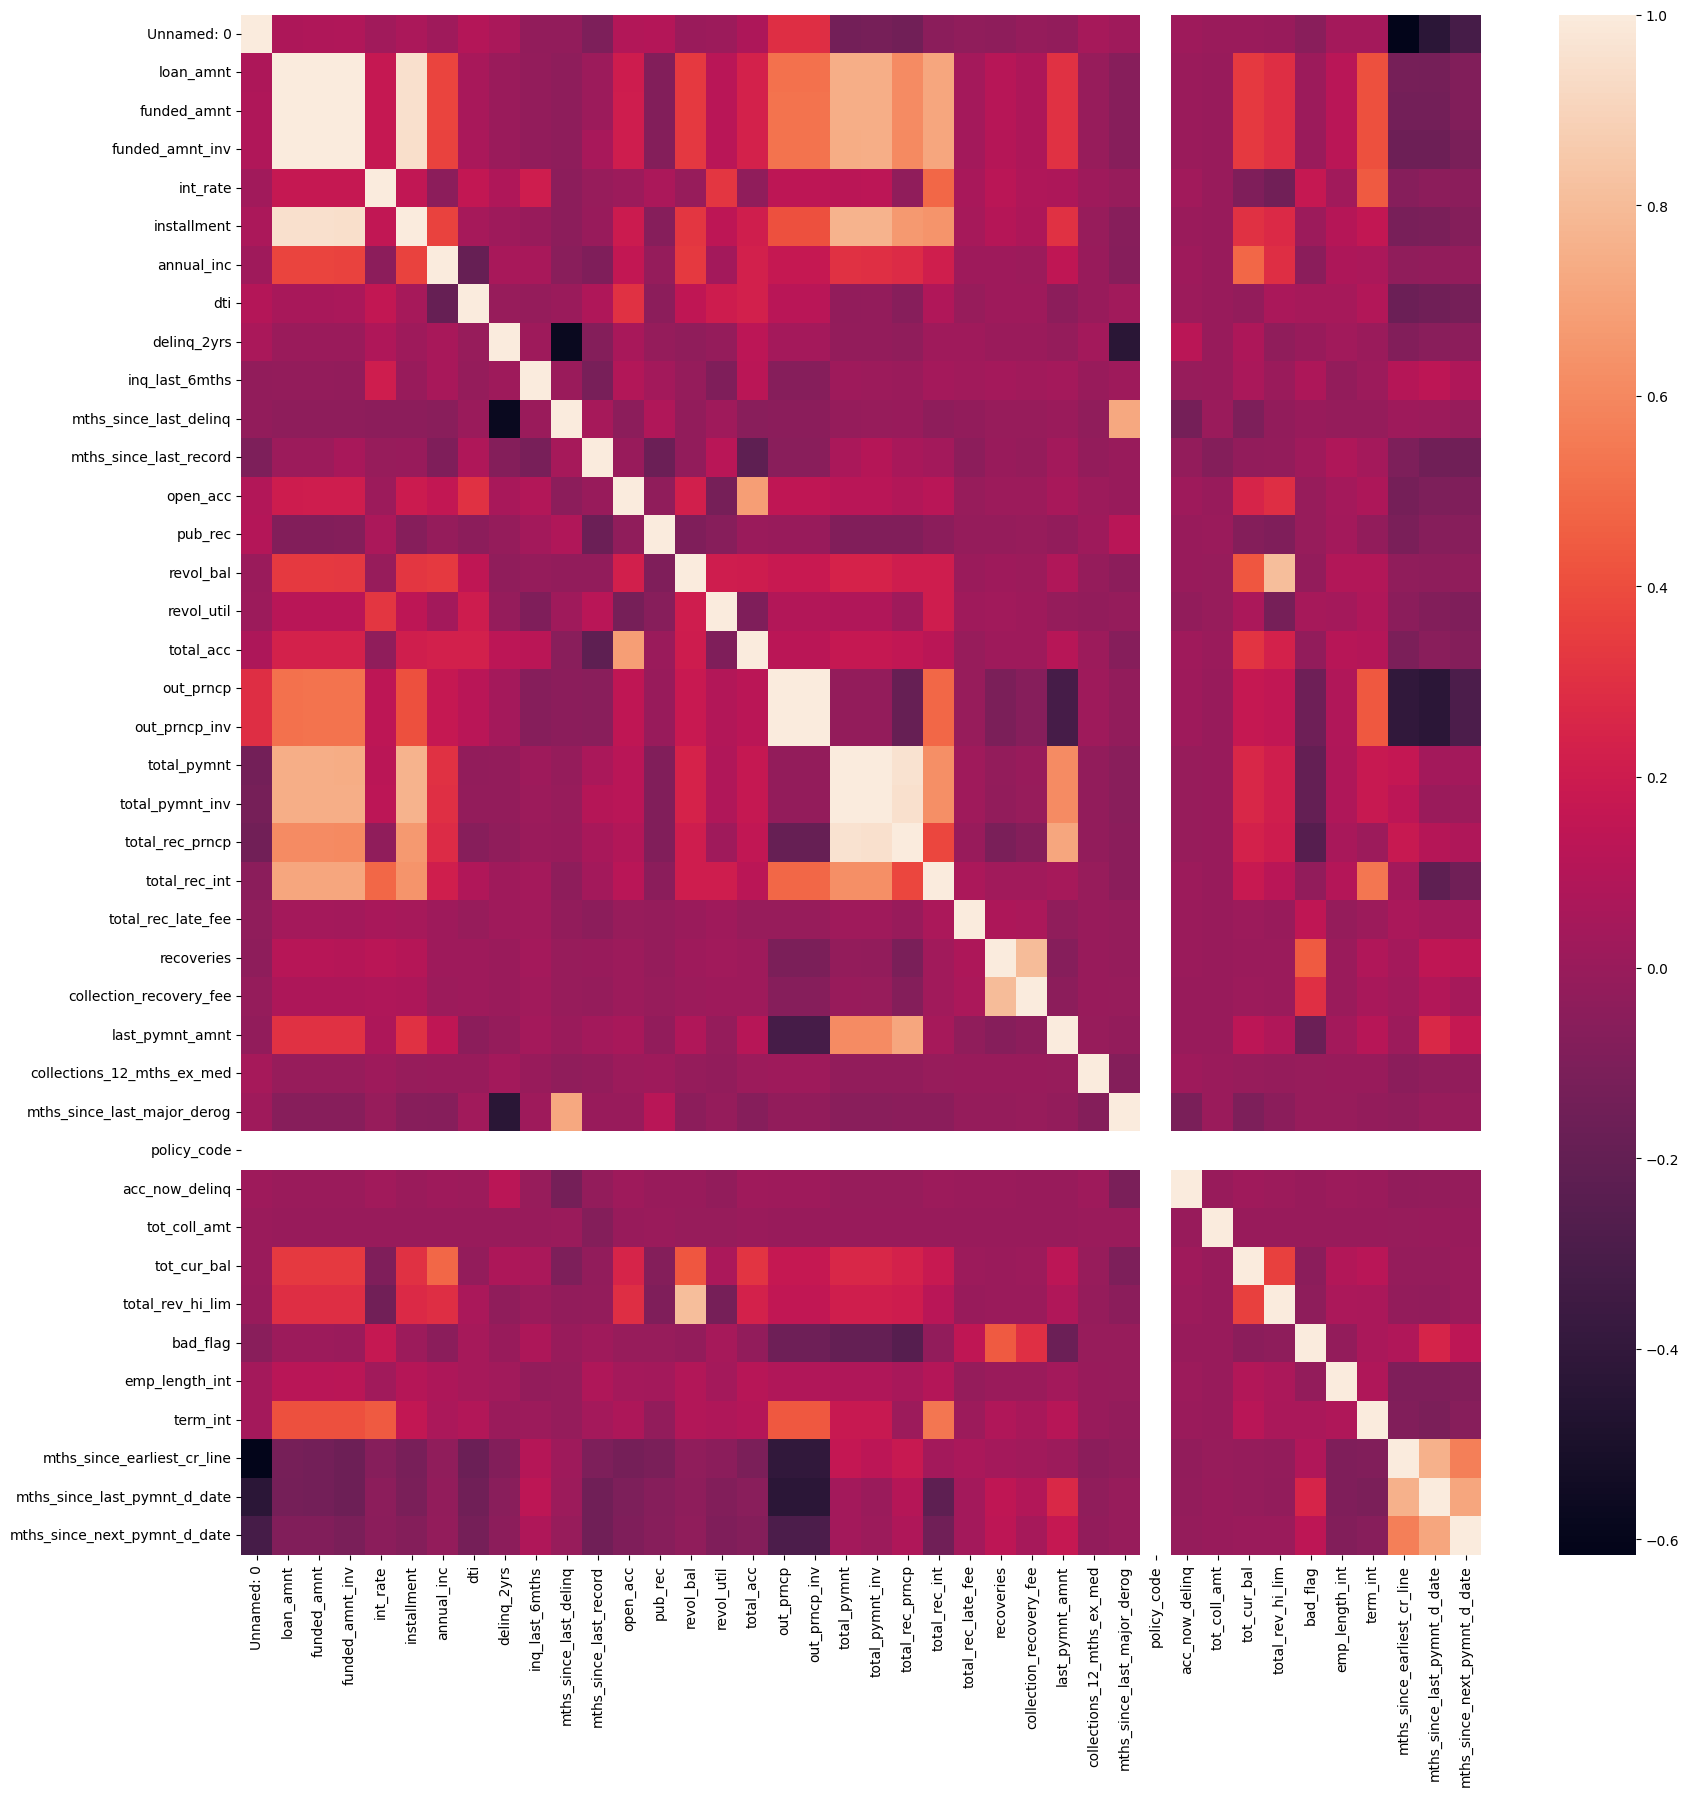

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [ ]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-45-3e25d71278db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()
<ipython-input-45-3e25d71278db>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d_date',
 'mths_since_next_pymnt_d_date']

In [ ]:
df.drop(to_drop_hicorr, axis=1, inplace=True)

###Cek Categorical Features

In [ ]:
df.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

In [ ]:
df.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [ ]:
df.select_dtypes(exclude='object').nunique()

Unnamed: 0                     466285
loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
bad_flag                            2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line        91
dtype: int64

In [ ]:
df.drop(['policy_code'], axis=1, inplace=True)

In [ ]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

In [ ]:
df.drop('pymnt_plan', axis=1, inplace=True)

In [ ]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_delinq        53.690554
tot_coll_amt                  15.071469
tot_cur_bal                   15.071469
emp_length_int                 4.505399
revol_util                     0.072917
collections_12_mths_ex_med     0.031097
delinq_2yrs                    0.006219
inq_last_6mths                 0.006219
open_acc                       0.006219
pub_rec                        0.006219
total_acc                      0.006219
acc_now_delinq                 0.006219
annual_inc                     0.000858
dtype: float64

In [ ]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
df['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['collections_12_mths_ex_med'].fillna(0, inplace=True)
df['revol_util'].fillna(0, inplace=True)
df['emp_length_int'].fillna(0, inplace=True)
df['tot_cur_bal'].fillna(0, inplace=True)
df['tot_coll_amt'].fillna(0, inplace=True)
df['mths_since_last_delinq'].fillna(-1, inplace=True)

# Feature Scaling And Transformation

### One Hot Encoding

Semua tipe data kategori di transform dengan metode one hot encoding

In [ ]:
categorical_cols = [col for col in df.select_dtypes(include='object').columns.tolist()]

In [ ]:
onehot = pd.get_dummies(df[categorical_cols], drop_first=True)

In [ ]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Standardization

Untuk fitur dengan tipe data numerical maka akan transform menggunakan metode StandardScaler

In [ ]:
numerical_cols = [col for col in df.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [ ]:
std.head()

,Unnamed: 0,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line
0,-1.732047,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.446626
1,-1.732040,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,1.446626
2,-1.732032,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.446626
3,-1.732025,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.446626
4,-1.732017,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.257509,1.622784,1.446626


### Transformed Dataframe

Gabungkan semua kolom yang sudah ditransformasi

In [ ]:
df_merge = pd.concat([onehot, std, df[['bad_flag']]], axis=1)

# Modeling

## Split Train Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_merge.drop('bad_flag', axis=1)
y = df_merge['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((373028, 99), (93257, 99))

## Training Process

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [ ]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values

df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
91,recoveries,4.932798e-01
89,out_prncp,1.379233e-01
90,total_rec_late_fee,1.306106e-01
78,int_rate,5.751976e-02
76,Unnamed: 0,2.338329e-02
98,mths_since_earliest_cr_line,2.110018e-02
4,grade_F,1.808945e-02
2,grade_D,1.747472e-02
3,grade_E,1.685827e-02
97,term_int,1.367309e-02



##Cross Validation

Untuk mengukur performa model, dua metrik yang umum dipakai dalam dunia credit risk adalah AUC dan KS.

In [ ]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)


NameError: ignored

In [ ]:
model_grid = RandomForestClassifier(max_depth=9,
                                    max_features="log2",
                                    max_leaf_nodes=9,
                                    n_estimators=25)
model_grid.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))


In [ ]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)


In [ ]:
model_random = RandomForestClassifier(max_depth=3,
                                      max_features='log2',
                                      max_leaf_nodes=6,
                                      n_estimators=100)
model_random.fit(X_train, y_train)
y_pred_rand = model.predict(X_test)
print(classification_report(y_pred_rand, y_test))


###AUC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

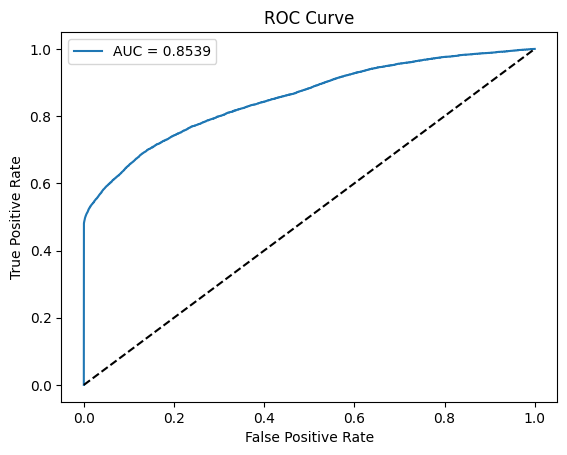

In [ ]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

KS

In [ ]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [ ]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,321938,0,0.050487,1,0,1,0.000011,0.0,0.000012
1,352638,0,0.050810,2,0,2,0.000021,0.0,0.000024
2,334474,0,0.050818,3,0,3,0.000032,0.0,0.000036
3,361919,0,0.050875,4,0,4,0.000043,0.0,0.000048
4,294655,0,0.051017,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5591')

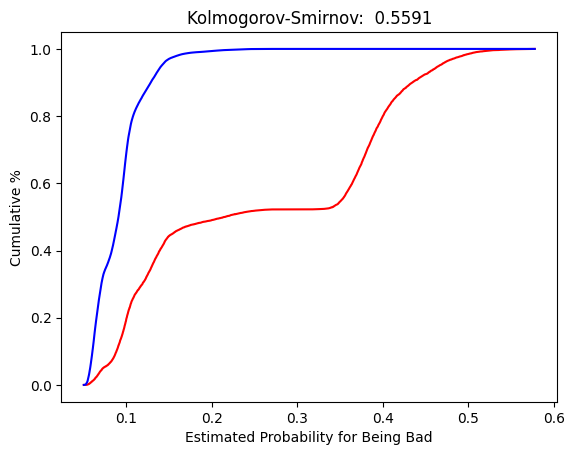

In [ ]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Model yang dibangun menghasilkan performa AUC = 0.857 dan KS = 0.56. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.